<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
!نه به دنیای رنگی
</font>
</h1>

---

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
وارد کردن کتابخانه‌های مورد نیاز
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش کتابخانه‌های مورد نیاز برای انجام پروژه را وارد می‌کنیم.
</font>
</p>

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بارگذاری تصاویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصاویری که در به عنوان نمونه در اختیار شما قرار گرفته است را در سلول زیر بارگذاری کنید. و سپس به کمک <code>matplotlib</code> نمایش دهید.
</font>
</p>

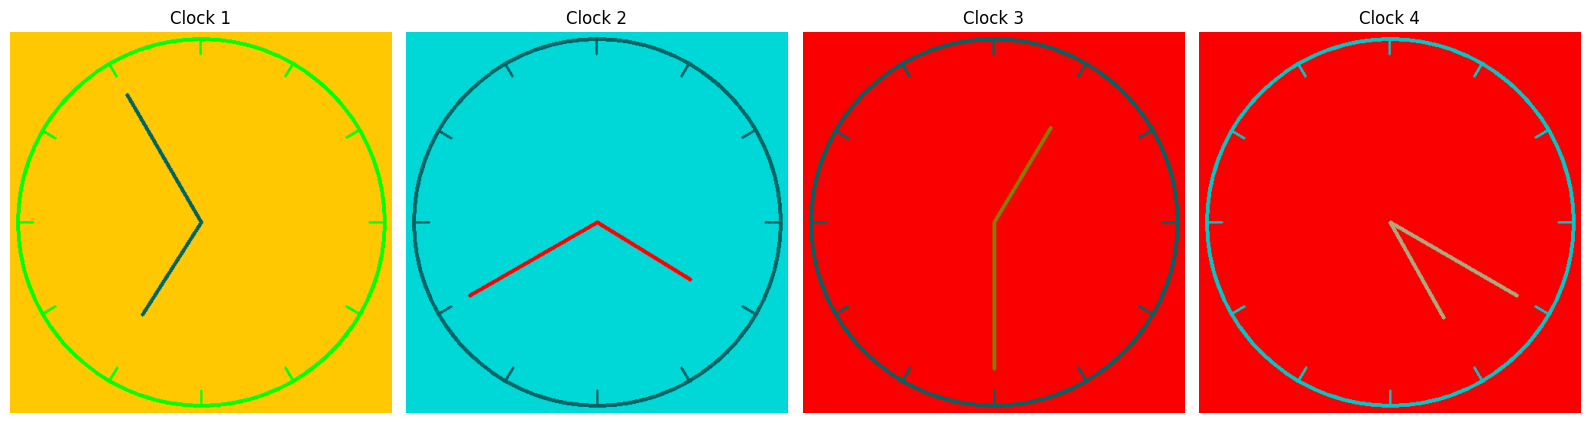

In [49]:
clocks = []
for i in range(1, 5):
    clocks.append(cv2.imread(f"../Data/clock{i}.png"))

plt.figure(figsize=(16, 8))

for i, clock in enumerate(clocks):
    plt.subplot(1, 4, i + 1)
    plt.title(f"Clock {i+1}")
    plt.axis("off")
    plt.imshow(cv2.cvtColor(clock, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابعاد تصاویر خوانده شده را نمایش دهید و با هم مقایسه کنید.
</font>
</p>

In [50]:
for i, clock in enumerate(clocks):
    print(f"Clock {i+1} shape: {clock.shape}")

Clock 1 shape: (500, 500, 3)
Clock 2 shape: (500, 500, 3)
Clock 3 shape: (500, 500, 3)
Clock 4 shape: (500, 500, 3)


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
محاسبه میانگین روشنایی تصاویر
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در سلول زیر، تابعی بنویسید که تصویر را دریافت کرده و میانگین روشنایی تصویر را محاسبه کند. برای دقیق تر بودن میزان روشنایی محاسبه شده پیشنهاد میشود که ابتدا تصاویر را به مدل رنگی <code>YCrCb</code> ابتدا تبدیل کرده و سپس میزان روشنایی تصاویر را محاسبه و با هم مقایسه کنید.
</font>
</p>

In [51]:
def calculate_brightness(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img)
    mean_brightness = np.mean(y)
    return mean_brightness


brightness_means = []

for i, clock in enumerate(clocks):
    brightness_mean = calculate_brightness(clock)
    brightness_means.append(brightness_mean)
    print(f"Mean brightness for clock {i+1}: {brightness_mean:.3f}")

Mean brightness for clock 1: 191.737
Mean brightness for clock 2: 147.831
Mean brightness for clock 3: 75.090
Mean brightness for clock 4: 77.733


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سیاه و سفید سازی
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در سلول زیر باید تابعی بنویسید که تصاویر ساعت با فرمت و شکلی که در اختیار شما قرار داده شده را دریافت کرده و آن را به یک تصویر تبدیل کند که صفحه ساعت سفید باشد و بقیه اجزای ساعت سیاه خالص باشد. دقت کنید این تصویر با مشخصات داده شده باید در نهایت به شکل سطح خاکستری return شود.
<br>
اسم تابع نباید تغییری داده شود. در غیر اینصورت نمره ای نخواهید گرفت.
</font>
</p>

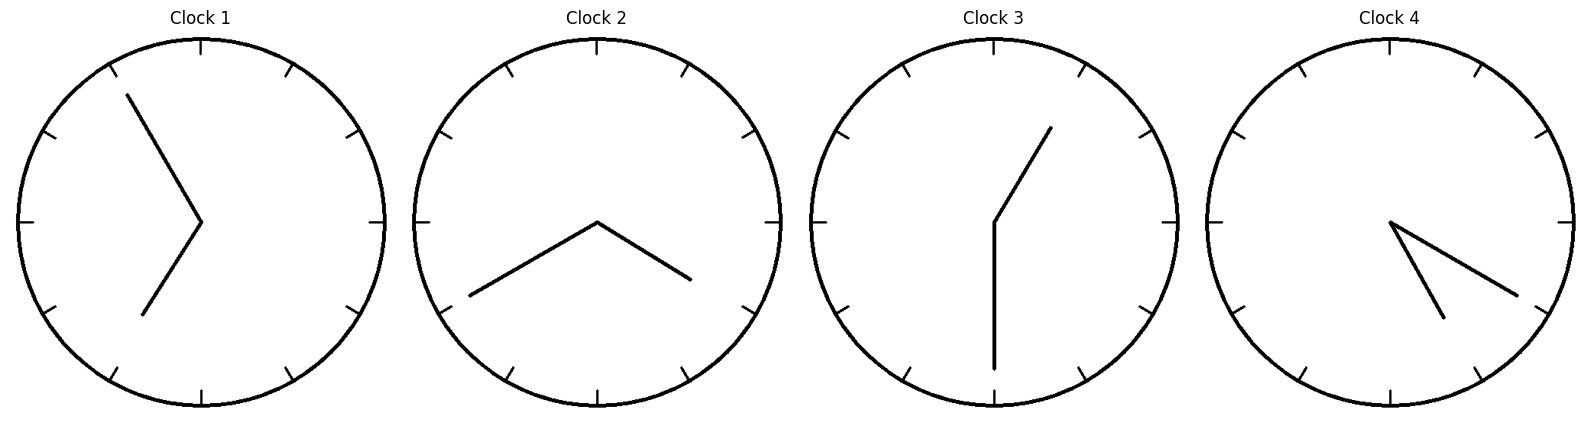

In [52]:
def black_white_convertor(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    background_pixel = np.argmax(hist)
    output = np.zeros_like(img, dtype=np.uint8)
    output[img == background_pixel] = 255
    return output


plt.figure(figsize=(16, 8))

for i, clock in enumerate(clocks):
    plt.subplot(1, 4, i + 1)
    plt.title(f"Clock {i+1}")
    plt.axis("off")
    plt.imshow(black_white_convertor(clock), cmap="gray")

plt.tight_layout()
plt.show()

<div dir="rtl">
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>
</div>
<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [53]:
import zipfile
from inspect import getsource


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

imp = """
import cv2
import numpy as np
"""

%save black_white_convertor imp + getsource(black_white_convertor)


file_names = ["black_white_convertor.py", "notebook.ipynb"]
compress(file_names)

The following commands were written to file `black_white_convertor.py`:

import cv2
import numpy as np
def black_white_convertor(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    background_pixel = np.argmax(hist)
    output = np.zeros_like(img, dtype=np.uint8)
    output[img == background_pixel] = 255
    return output

File Paths:
['black_white_convertor.py', 'notebook.ipynb']
